In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.interpolate import make_interp_spline
from sklearn.linear_model import LogisticRegression
import difflib
from sklearn.dummy import DummyClassifier
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

from nltk.corpus import movie_reviews
from nltk.stem.snowball import PorterStemmer
import string
import re

import tensorflow 
from tensorflow import keras
#import spacy
#from spacy.lang.en.stop_words import STOP_WORDS
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
# Load the nltk dataset
nltk.download('movie_reviews', quiet=True)

True

In [6]:
x = [' '.join(movie_reviews.words(file_id)) for file_id in movie_reviews.fileids()]
y = [movie_reviews.categories(file_id)[0] for file_id in movie_reviews.fileids()]

y = [0 if label == 'neg' else 1 for label in y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

stemmer = PorterStemmer()

def stopword_and_stem_tokenizer(corpus):
    """
    Custom tokenizer function to be passed in TfidfVectorizer.
    Ignores english stopwords and applies stemming to remaining tokens.
    """
    tokens = [word for sentence in nltk.word_tokenize(corpus) for word in nltk.word_tokenize(sentence)]
    valid_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token): # ignore non-alphabetic characters
            valid_tokens.append(token)
    result = [stemmer.stem(t) for t in valid_tokens if t not in stopwords.words('english')]
    return result

In [8]:
corpora = []
y_new = []
for i,sentence in enumerate(x_train):
  #  st = stopword_and_stem_tokenizer(sentence)
   # stl = str(st)
    curr = word_tokenize(sentence)
    curr = [word for word in curr]
    ioi = [y_train[i] for word in curr]
    y_new.append(ioi)
    corpora.append(curr)
    
        
    
test_x = []
for sentence in x_test:
   # st = stopword_and_stem_tokenizer(sentence)
  #  stl = str(st)
    curr = word_tokenize(sentence)
    curr = [word for word in curr]
    test_x.append(curr)

In [9]:
#corpora = []
#y_new = []
#for j,i in enumerate(x_train):
 #   corpora.append(i.split('.'))
  #  for k in range(len(i.split('.'))):
   #     y_new.append(y_train[j])
        
#flat = [x for row in corpora for x in row]

    
ultra = []
y_tests = []
for j,i in enumerate(x_test):
    ultra.append(i.split('.'))
    for k in range(len(i.split('.'))):
        y_tests.append(y_test[j])
    
extra = [x for row in ultra for x in row]

### Methods to assess the performance of each classifier

As stated, the idea of implementing a polynomial classifier was set; however, to assess the polynomial classifier objectively a direct comparison between the polynomial classifier and other machine learning methods is necessary. For this reason, a classification report as well as the confusion matrix for each classifier is a coded method.

In [10]:
def sk_metrics(y_test,prediction_test,x_test,clf):
    print('Testing set')
    print('===========')
    print(classification_report(y_test, prediction_test, zero_division=0))
    # confusion matrix
    ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, values_format='.0f')
    plt.show()

In [11]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
preds = dummy_clf.predict(x_test)

Testing set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       302
           1       0.50      1.00      0.66       298

    accuracy                           0.50       600
   macro avg       0.25      0.50      0.33       600
weighted avg       0.25      0.50      0.33       600



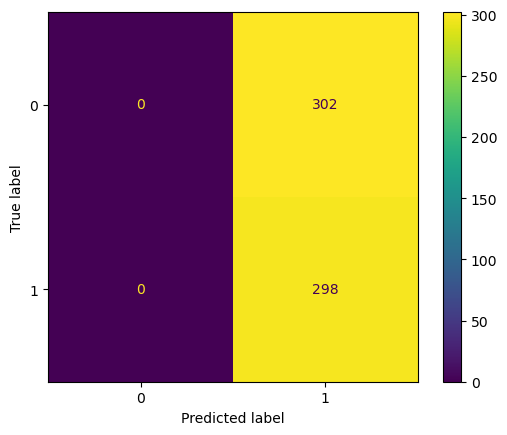

In [12]:
sk_metrics(y_test,preds,x_test,dummy_clf)

In [17]:
class D1LP(object):
    def __init__(self, valid_data, eval_data):
        super(object, self).__init__()
        self.validation_data = valid_data
        self.evaluation_data = eval_data
        
        
    def separate(self,imp,lotion):
        T = []
        Y0=self.evaluation_data
        X0 = self.validation_data # images

        for x in range(len(set(Y0))):
            T.append([])
            
        for x,i in enumerate(Y0):
            T[i].append(lotion[x])
            
        return T

    
    def EuC(self,error,test): 
        euge = np.max([difflib.SequenceMatcher(None,t,test).ratio() for t in error])
        return euge
    
    
   
            
    def classify(self,test_data):
        arr = set(self.evaluation_data)
        X0 = self.validation_data
        Y0 = self.evaluation_data
        

        train_x = []
        for i,j in enumerate(X0):
            train_x.append(j)
        hoc = self.separate(X0,train_x)
        
        test_x = []
        for i,j in enumerate(test_data):
          #  flat = [x for row in matrix for x in row]
            test_x.append(j)
        
        land = []
        for al8da in tqdm(range(len(test_x)),ascii=' >=',bar_format='{desc:<5.5}{percentage:3.0f}%|{bar:50}{r_bar}'):
            mos = []
            for ad in range(len(arr)):
                ris = self.EuC(hoc[ad],test_x[al8da])
                mos.append(ris)
            land.append(np.argmax(mos))

        return land
        

In [ ]:
ML = D1LP(corpora[:50],y_train[:50])

preds = []
for i,j in enumerate(ultra[:10]):
    pred = []
    for s in range(len(ultra[i])):
        pred.append(ML.classify(j))
    preds.append(pred)
preds

       0%|                                                  | 0/45 [00:00<?, ?it/s]

0.04390243902439024
0.06334841628959276
0.0165016501650165
0.014783526927138331
0.03180212014134275
0.0535279805352798
0.04338394793926247


      16%|=======>                                          | 7/45 [00:00<00:00, 62.33it/s]

0.015082956259426848
0.04481792717086835
0.014787430683918669
0.056338028169014086
0.04081632653061224
0.0514018691588785
0.05


      31%|===============>                                  | 14/45 [00:00<00:00, 62.66it/s]

0.057649667405764965
0.038781163434903045
0.021052631578947368
0.0
0.0
0.03773584905660377
0.04807692307692308
0.025
0.0
0.0
0.03773584905660377


      56%|===========================>                      | 25/45 [00:00<00:00, 81.60it/s]

0.0
0.0
0.01929260450160772
0.0
0.0
0.0110803324099723
0.034653465346534656
0.0
0.0
0.029411764705882353
0.014265335235378032
0.043333333333333335
0.03115264797507788
0.07202216066481995
0.058823529411764705


      89%|============================================      | 40/45 [00:00<00:00, 102.09it/s]

0.07425742574257425
0.014134275618374558
0.03608247422680412
0.013513513513513514
0.04790419161676647


       0%|                                                  | 0/45 [00:00<?, ?it/s]

0.04390243902439024
0.06334841628959276
0.0165016501650165
0.014783526927138331
0.03180212014134275
0.0535279805352798
0.04338394793926247


      16%|=======>                                          | 7/45 [00:00<00:00, 68.81it/s]

0.015082956259426848
0.04481792717086835
0.014787430683918669
0.056338028169014086
0.04081632653061224
0.0514018691588785
0.05


      31%|===============>                                  | 14/45 [00:00<00:00, 67.60it/s]

0.057649667405764965
0.038781163434903045
0.021052631578947368
0.0
0.0
0.03773584905660377
0.04807692307692308
0.025
0.0
0.0
0.03773584905660377


      56%|===========================>                      | 25/45 [00:00<00:00, 85.87it/s]

0.0
0.0
0.01929260450160772
0.0
0.0
0.0110803324099723
0.034653465346534656
0.0
0.0
0.029411764705882353
0.014265335235378032
0.043333333333333335
0.03115264797507788
0.07202216066481995


      87%|===========================================       | 39/45 [00:00<00:00, 105.65it/s]

0.058823529411764705
0.07425742574257425
0.014134275618374558
0.03608247422680412
0.013513513513513514
0.04790419161676647


       0%|                                                  | 0/45 [00:00<?, ?it/s]

0.04390243902439024
0.06334841628959276
0.0165016501650165
0.014783526927138331
0.03180212014134275
0.0535279805352798
0.04338394793926247


      16%|=======>                                          | 7/45 [00:00<00:00, 66.30it/s]

0.015082956259426848
0.04481792717086835
0.014787430683918669
0.056338028169014086
0.04081632653061224
0.0514018691588785
0.05


      31%|===============>                                  | 14/45 [00:00<00:00, 66.08it/s]

0.057649667405764965
0.038781163434903045
0.021052631578947368
0.0
0.0
0.03773584905660377
0.04807692307692308
0.025
0.0
0.0
0.03773584905660377
0.0
0.0
0.01929260450160772


      62%|===============================                   | 28/45 [00:00<00:00, 95.38it/s]

0.0
0.0
0.0110803324099723
0.034653465346534656
0.0
0.0
0.029411764705882353
0.014265335235378032
0.043333333333333335
0.03115264797507788
0.07202216066481995
0.058823529411764705
0.07425742574257425


      91%|=============================================>    | 41/45 [00:00<00:00, 99.22it/s]

0.014134275618374558
0.03608247422680412
0.013513513513513514
0.04790419161676647


       0%|                                                  | 0/45 [00:00<?, ?it/s]

0.04390243902439024
0.06334841628959276
0.0165016501650165
0.014783526927138331
0.03180212014134275
0.0535279805352798
0.04338394793926247


      16%|=======>                                          | 7/45 [00:00<00:00, 67.67it/s]

0.015082956259426848
0.04481792717086835
0.014787430683918669
0.056338028169014086
0.04081632653061224
0.0514018691588785
0.05


      31%|===============>                                  | 14/45 [00:00<00:00, 65.45it/s]

0.057649667405764965
0.038781163434903045
0.021052631578947368
0.0
0.0
0.03773584905660377
0.04807692307692308
0.025
0.0
0.0
0.03773584905660377


      56%|===========================>                      | 25/45 [00:00<00:00, 83.64it/s]

0.0
0.0
0.01929260450160772
0.0
0.0
0.0110803324099723
0.034653465346534656
0.0
0.0
0.029411764705882353
0.014265335235378032
0.043333333333333335
0.03115264797507788
0.07202216066481995
0.058823529411764705


      89%|============================================      | 40/45 [00:00<00:00, 104.77it/s]

0.07425742574257425
0.014134275618374558
0.03608247422680412
0.013513513513513514
0.04790419161676647


       0%|                                                  | 0/45 [00:00<?, ?it/s]

0.04390243902439024
0.06334841628959276
0.0165016501650165
0.014783526927138331
0.03180212014134275
0.0535279805352798
0.04338394793926247


      16%|=======>                                          | 7/45 [00:00<00:00, 67.79it/s]

0.015082956259426848
0.04481792717086835
0.014787430683918669
0.056338028169014086
0.04081632653061224
0.0514018691588785
0.05


      31%|===============>                                  | 14/45 [00:00<00:00, 66.51it/s]

0.057649667405764965
0.038781163434903045
0.021052631578947368
0.0
0.0
0.03773584905660377
0.04807692307692308
0.025
0.0
0.0
0.03773584905660377


      56%|===========================>                      | 25/45 [00:00<00:00, 85.04it/s]

0.0
0.0
0.01929260450160772
0.0
0.0
0.0110803324099723
0.034653465346534656
0.0
0.0
0.029411764705882353
0.014265335235378032
0.043333333333333335
0.03115264797507788
0.07202216066481995


      87%|===========================================       | 39/45 [00:00<00:00, 105.18it/s]

0.058823529411764705
0.07425742574257425
0.014134275618374558
0.03608247422680412
0.013513513513513514
0.04790419161676647


       0%|                                                  | 0/45 [00:00<?, ?it/s]

0.04390243902439024
0.06334841628959276
0.0165016501650165
0.014783526927138331
0.03180212014134275
0.0535279805352798
0.04338394793926247
0.015082956259426848


      18%|========>                                         | 8/45 [00:00<00:00, 75.34it/s]

0.04481792717086835
0.014787430683918669
0.056338028169014086
0.04081632653061224
0.0514018691588785
0.05
0.057649667405764965
0.038781163434903045


      36%|=================>                                | 16/45 [00:00<00:00, 64.56it/s]

0.021052631578947368
0.0
0.0
0.03773584905660377
0.04807692307692308
0.025
0.0
0.0
0.03773584905660377
0.0
0.0
0.01929260450160772
0.0
0.0
0.0110803324099723
0.034653465346534656
0.0
0.0


      76%|=====================================>            | 34/45 [00:00<00:00, 111.16it/s]

0.029411764705882353
0.014265335235378032
0.043333333333333335
0.03115264797507788
0.07202216066481995
0.058823529411764705
0.07425742574257425
0.014134275618374558
0.03608247422680412
0.013513513513513514
0.04790419161676647


       0%|                                                  | 0/45 [00:00<?, ?it/s]

0.04390243902439024
0.06334841628959276
0.0165016501650165
0.014783526927138331
0.03180212014134275
0.0535279805352798
0.04338394793926247
0.015082956259426848


      18%|========>                                         | 8/45 [00:00<00:00, 75.57it/s]

0.04481792717086835
0.014787430683918669
0.056338028169014086
0.04081632653061224
0.0514018691588785
0.05
0.057649667405764965
0.038781163434903045


      36%|=================>                                | 16/45 [00:00<00:00, 66.46it/s]

0.021052631578947368
0.0
0.0
0.03773584905660377
0.04807692307692308
0.025
0.0
0.0
0.03773584905660377
0.0
0.0
0.01929260450160772
0.0
0.0
0.0110803324099723
0.034653465346534656


      71%|===================================>              | 32/45 [00:00<00:00, 103.97it/s]

0.0
0.0
0.029411764705882353
0.014265335235378032
0.043333333333333335
0.03115264797507788
0.07202216066481995
0.058823529411764705
0.07425742574257425
0.014134275618374558
0.03608247422680412


      96%|===============================================>  | 43/45 [00:00<00:00, 100.74it/s]

0.013513513513513514
0.04790419161676647


       0%|                                                  | 0/45 [00:00<?, ?it/s]

0.04390243902439024
0.06334841628959276
0.0165016501650165
0.014783526927138331
0.03180212014134275
0.0535279805352798
0.04338394793926247


      16%|=======>                                          | 7/45 [00:00<00:00, 65.66it/s]

0.015082956259426848
0.04481792717086835
0.014787430683918669
0.056338028169014086
0.04081632653061224
0.0514018691588785
0.05


      31%|===============>                                  | 14/45 [00:00<00:00, 64.33it/s]

0.057649667405764965
0.038781163434903045
0.021052631578947368
0.0
0.0
0.03773584905660377
0.04807692307692308
0.025
0.0
0.0
0.03773584905660377


      56%|===========================>                      | 25/45 [00:00<00:00, 83.65it/s]

0.0
0.0
0.01929260450160772
0.0
0.0
0.0110803324099723
0.034653465346534656
0.0
0.0
0.029411764705882353
0.014265335235378032
0.043333333333333335
0.03115264797507788
0.07202216066481995


      87%|===========================================       | 39/45 [00:00<00:00, 104.32it/s]

0.058823529411764705
0.07425742574257425
0.014134275618374558
0.03608247422680412
0.013513513513513514
0.04790419161676647


       0%|                                                  | 0/45 [00:00<?, ?it/s]

0.04390243902439024
0.06334841628959276
0.0165016501650165
0.014783526927138331
0.03180212014134275
0.0535279805352798
0.04338394793926247


      16%|=======>                                          | 7/45 [00:00<00:00, 65.48it/s]

0.015082956259426848
0.04481792717086835
0.014787430683918669
0.056338028169014086
0.04081632653061224
0.0514018691588785
0.05


      31%|===============>                                  | 14/45 [00:00<00:00, 65.20it/s]

0.057649667405764965
0.038781163434903045
0.021052631578947368
0.0
0.0
0.03773584905660377
0.04807692307692308
0.025
0.0
0.0
0.03773584905660377
0.0
0.0
0.01929260450160772


      62%|===============================                   | 28/45 [00:00<00:00, 95.46it/s]

0.0
0.0
0.0110803324099723
0.034653465346534656
0.0
0.0
0.029411764705882353
0.014265335235378032
0.043333333333333335
0.03115264797507788
0.07202216066481995
0.058823529411764705


      89%|============================================      | 40/45 [00:00<00:00, 104.31it/s]

0.07425742574257425
0.014134275618374558
0.03608247422680412
0.013513513513513514
0.04790419161676647


       0%|                                                  | 0/45 [00:00<?, ?it/s]

0.04390243902439024
0.06334841628959276
0.0165016501650165
0.014783526927138331
0.03180212014134275
0.0535279805352798
0.04338394793926247


      16%|=======>                                          | 7/45 [00:00<00:00, 69.96it/s]

0.015082956259426848
0.04481792717086835
0.014787430683918669
0.056338028169014086
0.04081632653061224
0.0514018691588785
0.05


      31%|===============>                                  | 14/45 [00:00<00:00, 66.26it/s]

0.057649667405764965
0.038781163434903045
0.021052631578947368
0.0
0.0
0.03773584905660377
0.04807692307692308
0.025
0.0
0.0
0.03773584905660377


      56%|===========================>                      | 25/45 [00:00<00:00, 85.59it/s]

0.0
0.0
0.01929260450160772
0.0
0.0
0.0110803324099723
0.034653465346534656
0.0
0.0
0.029411764705882353
0.014265335235378032
0.043333333333333335
0.03115264797507788
0.07202216066481995


      87%|===========================================       | 39/45 [00:00<00:00, 104.34it/s]

0.058823529411764705
0.07425742574257425
0.014134275618374558
0.03608247422680412
0.013513513513513514
0.04790419161676647


       0%|                                                  | 0/45 [00:00<?, ?it/s]

0.04390243902439024
0.06334841628959276
0.0165016501650165
0.014783526927138331
0.03180212014134275
0.0535279805352798
0.04338394793926247


      16%|=======>                                          | 7/45 [00:00<00:00, 68.90it/s]

0.015082956259426848
0.04481792717086835
0.014787430683918669
0.056338028169014086
0.04081632653061224
0.0514018691588785
0.05


      31%|===============>                                  | 14/45 [00:00<00:00, 66.79it/s]

0.057649667405764965
0.038781163434903045
0.021052631578947368
0.0
0.0
0.03773584905660377
0.04807692307692308
0.025
0.0
0.0
0.03773584905660377
0.0
0.0
0.01929260450160772


      62%|===============================                   | 28/45 [00:00<00:00, 95.42it/s]

0.0
0.0
0.0110803324099723
0.034653465346534656
0.0
0.0
0.029411764705882353
0.014265335235378032
0.043333333333333335
0.03115264797507788
0.07202216066481995
0.058823529411764705


      89%|============================================      | 40/45 [00:00<00:00, 103.84it/s]

0.07425742574257425
0.014134275618374558
0.03608247422680412
0.013513513513513514
0.04790419161676647


       0%|                                                  | 0/45 [00:00<?, ?it/s]

0.04390243902439024
0.06334841628959276
0.0165016501650165
0.014783526927138331
0.03180212014134275
0.0535279805352798
0.04338394793926247


      16%|=======>                                          | 7/45 [00:00<00:00, 66.90it/s]

0.015082956259426848
0.04481792717086835
0.014787430683918669
0.056338028169014086
0.04081632653061224
0.0514018691588785
0.05


      31%|===============>                                  | 14/45 [00:00<00:00, 61.78it/s]

0.057649667405764965
0.038781163434903045
0.021052631578947368
0.0
0.0
0.03773584905660377
0.04807692307692308
0.025
0.0
0.0
0.03773584905660377


      56%|===========================>                      | 25/45 [00:00<00:00, 80.77it/s]

0.0
0.0
0.01929260450160772
0.0
0.0
0.0110803324099723
0.034653465346534656
0.0
0.0
0.029411764705882353
0.014265335235378032
0.043333333333333335
0.03115264797507788
0.07202216066481995


      87%|===========================================       | 39/45 [00:00<00:00, 102.67it/s]

0.058823529411764705
0.07425742574257425
0.014134275618374558
0.03608247422680412
0.013513513513513514
0.04790419161676647


       0%|                                                  | 0/45 [00:00<?, ?it/s]

0.04390243902439024
0.06334841628959276
0.0165016501650165
0.014783526927138331
0.03180212014134275
0.0535279805352798
0.04338394793926247


      16%|=======>                                          | 7/45 [00:00<00:00, 67.48it/s]

0.015082956259426848
0.04481792717086835
0.014787430683918669
0.056338028169014086
0.04081632653061224
0.0514018691588785
0.05


      31%|===============>                                  | 14/45 [00:00<00:00, 66.20it/s]

0.057649667405764965
0.038781163434903045
0.021052631578947368
0.0
0.0
0.03773584905660377
0.04807692307692308
0.025
0.0
0.0
0.03773584905660377


      56%|===========================>                      | 25/45 [00:00<00:00, 82.92it/s]

0.0
0.0
0.01929260450160772
0.0
0.0
0.0110803324099723
0.034653465346534656
0.0
0.0
0.029411764705882353
0.014265335235378032
0.043333333333333335
0.03115264797507788
0.07202216066481995
0.058823529411764705


      89%|============================================      | 40/45 [00:00<00:00, 104.42it/s]

0.07425742574257425
0.014134275618374558
0.03608247422680412
0.013513513513513514
0.04790419161676647


       0%|                                                  | 0/45 [00:00<?, ?it/s]

0.04390243902439024
0.06334841628959276
0.0165016501650165
0.014783526927138331
0.03180212014134275
0.0535279805352798
0.04338394793926247
0.015082956259426848


      18%|========>                                         | 8/45 [00:00<00:00, 75.31it/s]

0.04481792717086835
0.014787430683918669
0.056338028169014086
0.04081632653061224
0.0514018691588785
0.05
0.057649667405764965
0.038781163434903045


      36%|=================>                                | 16/45 [00:00<00:00, 65.38it/s]

0.021052631578947368
0.0
0.0
0.03773584905660377
0.04807692307692308
0.025
0.0
0.0
0.03773584905660377
0.0
0.0
0.01929260450160772
0.0
0.0
0.0110803324099723
0.034653465346534656


      71%|===================================>              | 32/45 [00:00<00:00, 101.62it/s]

0.0
0.0
0.029411764705882353
0.014265335235378032
0.043333333333333335
0.03115264797507788
0.07202216066481995
0.058823529411764705
0.07425742574257425
0.014134275618374558
0.03608247422680412


      96%|===============================================>  | 43/45 [00:00<00:00, 98.99it/s] 

0.013513513513513514
0.04790419161676647


       0%|                                                  | 0/45 [00:00<?, ?it/s]

0.04390243902439024
0.06334841628959276
0.0165016501650165
0.014783526927138331
0.03180212014134275
0.0535279805352798
0.04338394793926247


      16%|=======>                                          | 7/45 [00:00<00:00, 68.24it/s]

0.015082956259426848
0.04481792717086835
0.014787430683918669
0.056338028169014086
0.04081632653061224
0.0514018691588785
0.05


      31%|===============>                                  | 14/45 [00:00<00:00, 65.69it/s]

0.057649667405764965
0.038781163434903045
0.021052631578947368
0.0
0.0
0.03773584905660377
0.04807692307692308
0.025
0.0
0.0
0.03773584905660377


      56%|===========================>                      | 25/45 [00:00<00:00, 84.67it/s]

0.0
0.0
0.01929260450160772
0.0
0.0
0.0110803324099723
0.034653465346534656
0.0
0.0
0.029411764705882353
0.014265335235378032
0.043333333333333335
0.03115264797507788
0.07202216066481995


      87%|===========================================       | 39/45 [00:00<00:00, 104.42it/s]

0.058823529411764705
0.07425742574257425
0.014134275618374558
0.03608247422680412
0.013513513513513514
0.04790419161676647


       0%|                                                  | 0/45 [00:00<?, ?it/s]

0.04390243902439024
0.06334841628959276
0.0165016501650165
0.014783526927138331
0.03180212014134275
0.0535279805352798
0.04338394793926247


      16%|=======>                                          | 7/45 [00:00<00:00, 66.77it/s]

0.015082956259426848
0.04481792717086835
0.014787430683918669
0.056338028169014086
0.04081632653061224
0.0514018691588785
0.05


      31%|===============>                                  | 14/45 [00:00<00:00, 64.70it/s]

0.057649667405764965
0.038781163434903045
0.021052631578947368
0.0
0.0
0.03773584905660377
0.04807692307692308
0.025
0.0
0.0


In [16]:
from collections import Counter
prds = []
for i in preds:
    unique, frequency = np.unique(i,
                              return_counts = True)
    prds.append(frequency)
prds

[array([1260,  765]),
 array([648, 648]),
 array([ 987, 1222]),
 array([348, 493]),
 array([1200,  400]),
 array([512, 512]),
 array([714, 442]),
 array([570, 874]),
 array([2516, 2108]),
 array([351, 378])]

In [19]:
#predictions_test = np.argmax(model.predict(test_images, verbose=0), -1)
print('Testing set')
print('VV_______VV')
print(classification_report(y_test, preds))


# test: confusion matrix
cf_matrix = confusion_matrix(y_test, preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,)
cm_display.plot()
plt.show()

Testing set
VV_______VV


<class 'ValueError'>: Found input variables with inconsistent numbers of samples: [600, 10]

In [ ]:
ML = D1LP(Xo[:1000],y_train[:1000])
preds = ML.classify(Xto)

In [ ]:
#predictions_test = np.argmax(model.predict(test_images, verbose=0), -1)
print('Testing set')
print('VV_______PP')
print(classification_report(y_test, preds))


# test: confusion matrix
cf_matrix = confusion_matrix(y_test, preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,)
cm_display.plot()
plt.show()

In [ ]:
ML = D1LP(Xo,y)
preds = ML.classify(Xto)

In [ ]:
#predictions_test = np.argmax(model.predict(test_images, verbose=0), -1)
print('Testing set')
print('VV_______PP')
print(classification_report(y_test, preds))


# test: confusion matrix
cf_matrix = confusion_matrix(y_test, preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,)
cm_display.plot()
plt.show()